In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from nsepy import get_history as gh
import datetime as dt
import yfinance as yf
stock_symbol = "RELIANCE.NS" #NSE stocks usually end with .NS
# Download stock data
stk_data = yf.download(stock_symbol, start="2023-01-01", end="2023-07-01")

[*********************100%***********************]  1 of 1 completed


In [3]:
stk_data=stk_data[["Open","High","Low","Close"]]
#stk_data.to_csv("Tatacoffee13_21.csv")

In [4]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[["Close"]])
print("Len:",data1.shape)

Len: (122, 1)


In [6]:
orders=[(1,0,2),(1,0,1),(2,0,1),(1,0,1)]
#orderslist=[]
#rscorelist=[]
for i in orders:
    #orderslist.append(i)
    from statsmodels.tsa.arima.model import ARIMA
    model = ARIMA(data1, order=i)
    model_fit = model.fit()
    # make prediction
    y_pred= model_fit.predict(0, len(data1)-1)
    #print(y_pred)
    from stockFunctions import rmsemape
    rmsemape(data1,y_pred)
    

RMSE-Testset: 0.07352648494554541
maPe-Testset: 2862647372631.22
RMSE-Testset: 0.07340571806195162
maPe-Testset: 2843917138407.1724
RMSE-Testset: 0.07344451619645784
maPe-Testset: 2847531479720.668
RMSE-Testset: 0.07340571806195162
maPe-Testset: 2843917138407.1724


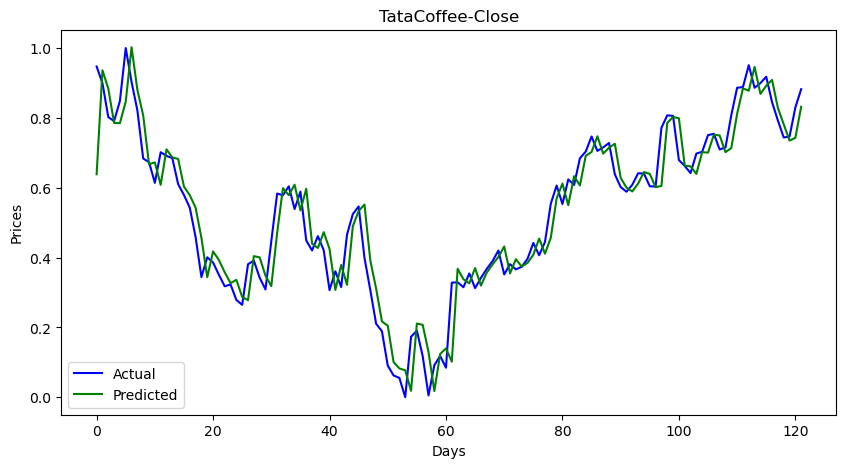

In [7]:
from stockFunctions import graph
graph(data1,y_pred,"Actual","Predicted","TataCoffee-Close","Days","Prices")

In [8]:
len(data1)

122

In [9]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(data1,["Close"])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,["Close"])

In [10]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,["Close"])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,["Close"])

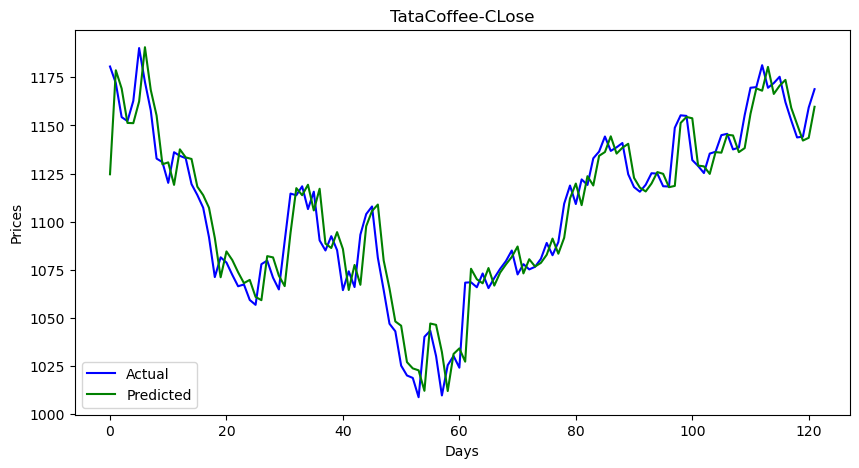

In [11]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-CLose","Days","Prices")

In [12]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 13.307595565307395
maPe-Testset: 0.009030226642990113


In [13]:
forecast=model_fit.predict(len(data1), len(data1)+3)

In [14]:
forecast

array([0.87777886, 0.8675293 , 0.8577189 , 0.84832881])

In [15]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [16]:
forecast_stock_price_test_oriF.to_csv("Closets.csv",index=False)

In [17]:
forecast_stock_price_test_oriF

,Closefore
0,1168.007535
1,1166.149412
2,1164.3709
3,1162.668588
